<a href="https://colab.research.google.com/github/jainoshika/DeepLense/blob/main/ANN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.18.0
Num GPUs Available: 0


In [2]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# divide dataset in independent and dependent features

In [6]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:,13] # output and dependent on X

In [7]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [8]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [9]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [10]:
#feature engg

In [11]:
geography = pd.get_dummies(X['Geography'])

In [12]:
gender = pd.get_dummies(X['Gender'])

In [13]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [14]:
X =X.drop(['Geography', 'Gender'], axis = 1)

In [15]:
X=pd.concat([X,geography, gender], axis = 1)

In [16]:
#splitting dataset into training set and test set

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [18]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [19]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ..., -0.57369368,
         1.09168714, -1.09168714]])

In [20]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -0.57369368,
         1.09168714, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  1.74309049,
         1.09168714, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  1.74309049,
        -0.91601335,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ..., -0.57369368,
        -0.91601335,  0.91601335]])

In [21]:
X_train.shape

(8000, 13)

In [22]:
#PART 2 - creating ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [23]:
# Initialise ANN
classifier = Sequential()

In [24]:
# Add input layer
classifier.add(Dense(units = 11, activation='relu'))

In [25]:
# Add first hidden layer
classifier.add(Dense(units = 7, activation='relu'))
classifier.add(Dropout(0.3)

In [26]:
# add second hidden layer
classifier.add(Dense(units = 6, activation='relu'))

In [27]:
# Add output layer
classifier.add(Dense(1, activation='sigmoid'))

In [28]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [30]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [31]:
#adam uses default LR of 0.01
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
#early stopping
import tensorflow as tf

tf.keras.backend.clear_session()
model_history= classifier.fit(X_train,y_train,validation_split = 0.33, batch_size = 10, epochs =1000, callbacks = early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7979 - loss: 0.4713 - val_accuracy: 0.8186 - val_loss: 0.4088
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8310 - loss: 0.3925 - val_accuracy: 0.8353 - val_loss: 0.3883
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8460 - loss: 0.3862 - val_accuracy: 0.8368 - val_loss: 0.3883
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8474 - loss: 0.3550 - val_accuracy: 0.8364 - val_loss: 0.3780
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8483 - loss: 0.3619 - val_accuracy: 0.8395 - val_loss: 0.3728
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8544 - loss: 0.3510 - val_accuracy: 0.8459 - val_loss: 0.3704
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8633 - loss: 0.3459 - val_accuracy: 0.8466 - val_loss: 0.3751
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8611 - loss: 0.3271 - 

In [33]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

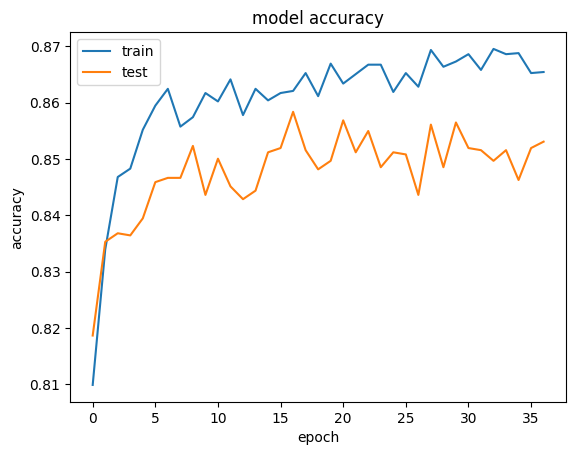

In [34]:
#summarise history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

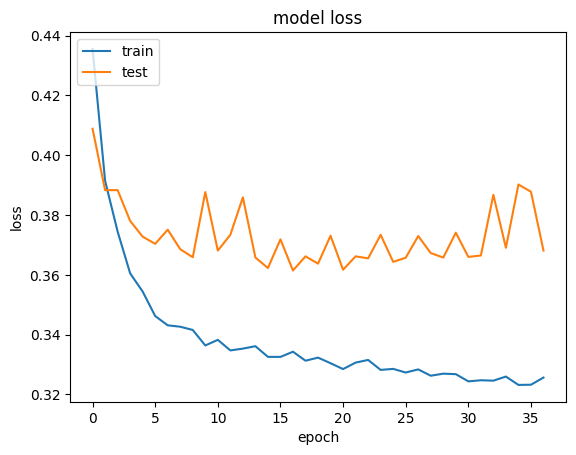

In [35]:
#summarise history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [36]:
# parrt 3 - making the predicitions and evlauating
#predicitng the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [37]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1514,   81],
       [ 198,  207]])

In [38]:
  # calcualte accuracy
  from sklearn.metrics import accuracy_score
  score = accuracy_score(y_pred, y_test)
  score

0.8605

In [39]:
#get weights
classifier.get_weights()

[array([[ 0.04560803, -0.5334164 ,  0.08701441, -0.5204709 ,  0.12781231,
          1.3005672 ,  0.4235292 ,  0.7887478 , -0.48696092, -0.57539177,
         -0.48291624],
        [ 2.2681088 , -1.6497302 ,  0.13714367,  1.6815714 ,  0.961613  ,
         -1.5913016 ,  0.77324563, -4.3643265 , -3.8484619 ,  0.6506068 ,
         -3.0105948 ],
        [ 0.2031533 , -0.91115326,  1.4251958 , -0.1408451 ,  0.24892919,
          0.34227666, -0.8448557 ,  0.51158166, -0.35009778,  0.5006959 ,
          1.3311641 ],
        [-0.6706529 , -1.935999  , -2.572693  , -0.49025363, -0.19980057,
         -2.6102903 ,  1.2878294 , -0.9384792 , -0.9711562 , -3.2634416 ,
         -0.0144311 ],
        [-0.27468964, -1.1301001 ,  0.21030375, -1.3596635 ,  3.914435  ,
         -0.99854434, -3.2083113 , -1.0121084 , -2.1938055 , -4.7073855 ,
         -0.7086682 ],
        [-0.29784322,  0.06276296, -0.92739123, -0.38194725, -0.01310168,
         -0.41649815, -1.239422  ,  0.02751174, -1.3353852 , -0.4311931